Added pbs2



# Import packages and set settings

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../python_modules')
import plotting_Sho1_ss as plotting
import model_supp_Sho1 as model_supp
import Sho1models_ss_pbs2 as model

In [3]:
%matplotlib inline
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import os
import collections
import h5py

In [4]:
# plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 14
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Model

## Model Variables (Constants)

In [5]:
dt = 0.1
steps = 601
time = np.linspace(0,dt*steps,steps)
Sho1_on = 1
Sln1_on = 1

# Protein concentrations (mM) #2
Sln1_tot = model_supp.molarity_conversion(1176)
Sho1_tot = model_supp.molarity_conversion(1534)
Pbs2_tot = model_supp.molarity_conversion(4076)
Hog1_tot = model_supp.molarity_conversion(8225)
wt_const = [Sln1_tot, Sho1_tot, Pbs2_tot, Hog1_tot, 0, Sln1_on, Sho1_on] #mM
sho1_const = [Sln1_tot, Sho1_tot, Pbs2_tot, Hog1_tot, 0, 0, Sho1_on] #mM
sln1_const = [Sln1_tot, Sho1_tot, Pbs2_tot, Hog1_tot, 0, Sln1_on, 0] #mM


# initial values
Sln1 = 0
Sho1 = 0
Pbs2A = 0
Hog1A = 0.01 * Hog1_tot
Glycerol = 0.0001
inits = [Sln1, Sho1, Pbs2A, Hog1A, Glycerol]

# doses
doses = [150, 350, 550]

# Parameter ranges
number_of_params = 24
minimums = [ -4, -4, -4, -4, -4,-4, -4, -4,-4,
           -4, -4, -4, -4, -4, -4, 
            -4, -4, -4, -4,
           -4, -4, -4, -4, -4]
    
maximums = [4, 4, 4, 4, 4,4, 4, 4,4,
            4, 4, 4, 4, 4, 4,
             4, 4, 4, 4,
            4, 4, 4, 4, 4]

labelnames = ['$kb_1$','$kb_2$','$b_1$','$b_2$', '$k1$', '$K1$', '$k2$', '$K2$', 
              '$k3$', '$K3$', '$k4$', '$K4$', '$k5$', '$K5$', '$k6$', '$K6$',
              '$k7$', '$K7$', '$k8$',  '$k10$', '$k11$', '$K11$',
              '$k12$', '$K12$' ]

diff = np.asarray(maximums)-np.asarray(minimums) #for plotting
dims = (diff, minimums) #for plotting

# Load experimental data

In [6]:
exp_data, exp_time = model_supp.get_data(input='Sho1')

wt_data, sln1_data, sho1_data = exp_data
wt_time, sln1_time, sho1_time = exp_time 

# Load simulation data

In [7]:
model_fxns = model.Model(model.M10)

In [8]:
folder = '../sim_data/200507_Model1Sho1ss_v010/'
all_params, last_params, all_mses, last_mses = model_supp.get_sim_data(folder, num_sims=2000)

Number of runs collected: 1000
Best last gen MSE: 7960.498753216227
Mean last gen MSEs of top 5%: 9088.174277966084


In [9]:
sorted_mses_EA, sorted_thetas_EA = model_supp.sort_mses_thetas(last_mses, last_params)

# Check EA results

No handles with labels found to put in legend.


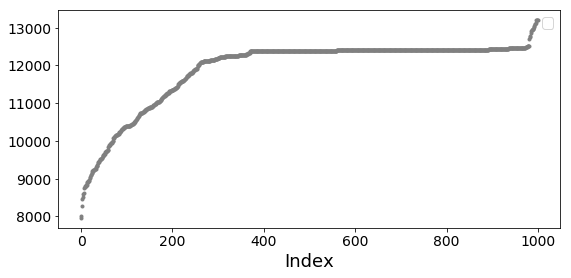

In [10]:
plotting.plt_idx_vs_mse(sorted_mses_EA, len(sorted_mses_EA))

No handles with labels found to put in legend.


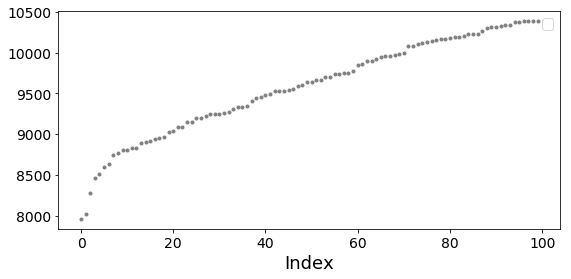

In [10]:
plotting.plt_idx_vs_mse(sorted_mses_EA, 100)

<Figure size 720x576 with 0 Axes>

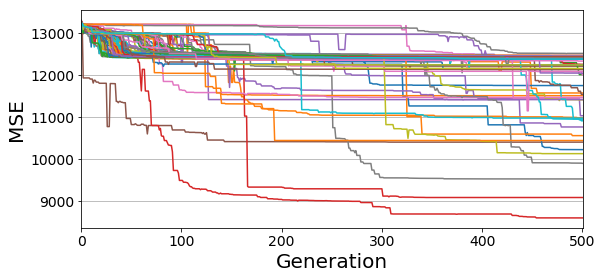

In [11]:
plotting.plt_mses_gen(len(all_mses[0]), all_mses, 100)

Dose: 150 complete.
Dose: 350 complete.
Dose: 550 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

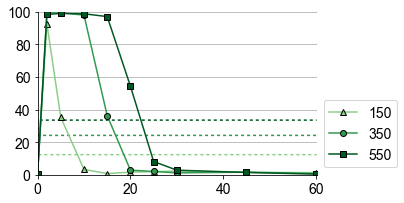

In [12]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[0:1], wt_const, inits, doses, time, param='phospho',
                        exp_data=wt_data, exp_time=wt_time, ss=True, Sln1=False, Sho1=False, ci='sd',
                        save_fig='')

Dose: 150 complete.
Dose: 350 complete.
Dose: 550 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserW

<Figure size 720x576 with 0 Axes>

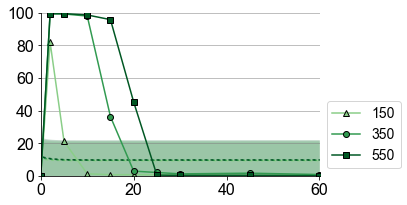

In [25]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[0:10], sln1_const, inits, doses, time, param='phospho',
                        exp_data=sln1_data, exp_time=sln1_time, ss=True, Sln1=True, Sho1=False, ci='sd',
                        save_fig='')

Dose: 150 complete.
Dose: 350 complete.
Dose: 550 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarnin

<Figure size 720x576 with 0 Axes>

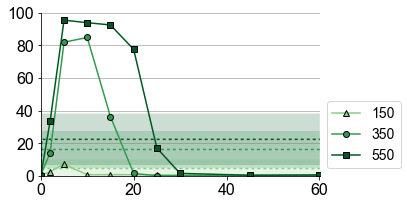

In [26]:
plotting.plt_param_cis(model_fxns, sorted_thetas_EA[0:3], sho1_const, inits, doses, time, param='phospho',
                        exp_data=sho1_data, exp_time=sho1_time, ss=True, Sln1=False, Sho1=True, ci='sd',
                        save_fig='')

[ 4.43745154e-05  2.50660777e-07  2.30241983e-06  1.31896866e-12
 -4.20725105e-08]
[1.99727432e-05 5.78911341e-05 2.57193636e-05 2.52092598e-08
 5.82378234e-07]
[4.43810571e-05 1.89160070e-13 3.31843779e-05 3.48677144e-09
 7.42221117e-03]
[4.43810585e-05 3.16878273e-14 2.35228206e-05 1.08431215e-08
 1.41138566e-01]
[4.43816754e-05 2.06734636e-16 4.61487767e-05 8.29716112e-05
 9.94024418e+02]
[-1.67885964e-21  5.77524553e-05  5.03084609e-09  4.00182710e-07
  3.53018399e+01]
[1.42322377e-21 5.78911389e-05 2.46827759e-10 3.31986930e-07
 3.28475750e+01]
[1.55817713e-16 4.45491538e-10 4.90283447e-11 4.34612082e-07
 4.30184856e+01]
[4.41539346e-15 2.09714450e-05 2.01514341e-05 2.49301189e-08
 1.66614831e-01]
[ 4.40585465e-05  5.89677508e-09  2.03925125e-07 -6.41783724e-28
 -8.95743572e-01]
[ 4.43745154e-05  2.50660777e-07  2.30241983e-06  1.31896866e-12
 -4.20725105e-08]
[1.99727432e-05 5.78911341e-05 2.57193636e-05 2.52092598e-08
 5.82378234e-07]
[4.43810571e-05 1.89160070e-13 3.31843779e-0

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

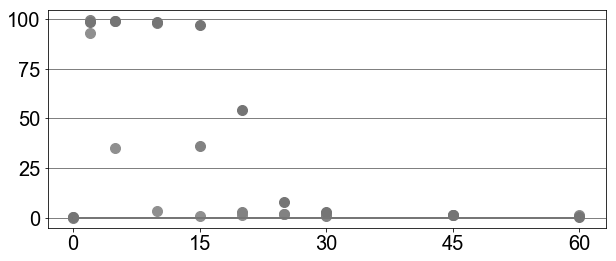

In [21]:
# glycerol
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, wt_const, inits,  doses, time, 'gly', mapk_data=wt_data, mapk_t100a_data=None, mapk_time=wt_time,ss=True, Sln1=False, Sho1=False)

[ 4.43745154e-05  2.50660777e-07  2.30241983e-06  1.31896866e-12
 -4.20725105e-08]
[1.99727432e-05 5.78911341e-05 2.57193636e-05 2.52092598e-08
 5.82378234e-07]
[4.43810571e-05 1.89160070e-13 3.31843779e-05 3.48677144e-09
 7.42221117e-03]
[4.43810585e-05 3.16878273e-14 2.35228206e-05 1.08431215e-08
 1.41138566e-01]
[4.43816754e-05 2.06734636e-16 4.61487767e-05 8.29716112e-05
 9.94024418e+02]
[-1.67885964e-21  5.77524553e-05  5.03084609e-09  4.00182710e-07
  3.53018399e+01]
[1.42322377e-21 5.78911389e-05 2.46827759e-10 3.31986930e-07
 3.28475750e+01]
[1.55817713e-16 4.45491538e-10 4.90283447e-11 4.34612082e-07
 4.30184856e+01]
[4.41539346e-15 2.09714450e-05 2.01514341e-05 2.49301189e-08
 1.66614831e-01]
[ 4.40585465e-05  5.89677508e-09  2.03925125e-07 -6.41783724e-28
 -8.95743572e-01]
[ 4.43745154e-05  2.50660777e-07  2.30241983e-06  1.31896866e-12
 -4.20725105e-08]
[1.99727432e-05 5.78911341e-05 2.57193636e-05 2.52092598e-08
 5.82378234e-07]
[4.43810571e-05 1.89160070e-13 3.31843779e-0

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

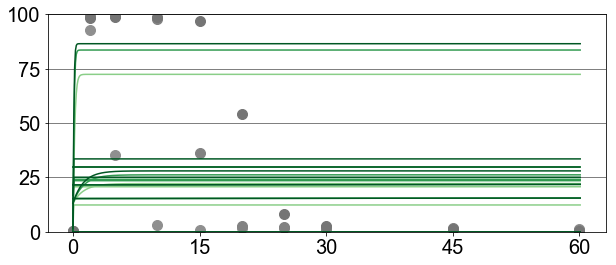

In [24]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, wt_const, inits,  doses, time, 'phospho', mapk_data=wt_data, mapk_t100a_data=None, mapk_time=wt_time,ss=True, Sln1=False, Sho1=False)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[-5.86719946e-04  2.50638969e-07 -7.51581003e-08  1.20949664e-04
  7.24464825e-01]
[1.98073982e-05 5.43948618e-05 2.55803942e-05 1.44371543e-04
 3.33172725e-03]
[4.43810505e-05 4.31574867e-15 3.26088675e-05 1.54854043e-07
 3.29634285e-01]
[ 4.43810586e-05  4.31847167e-11  3.16495054e-05 -9.95279550e-29
 -7.40291102e-02]
[4.43816754e-05 2.06733036e-16 4.61487764e-05 8.29716108e-05
 9.94024413e+02]
[4.47578065e-17 5.77531700e-05 1.69547506e-14 1.35372362e-12
 1.14833884e-05]
[4.45958391e-17 5.78912900e-05 7.12202780e-15 9.58173430e-12
 9.48039541e-04]
[1.09389721e-18 5.63169315e-06 4.63423332e-16 4.13069843e-12
 4.08768094e-04]
[8.03727000e-12 1.91139100e-05 3.95114531e-08 8.76400199e-05
 5.85722319e+02]
[ 4.39831376e-05 -6.82497000e-01  1.32883823e-07  1.80524338e-04
  4.61944441e+02]
[-5.86719946e-04  2.50638969e-07 -7.51581003e-08  1.20949664e-04
  7.24464825e-01]
[1.98073982e-05 5.43948618e-05 2.55803942e-05 1.44371543e-04
 3.33172725e-03]
[4.43810505e-05 4.31574867e-15 3.26088675e-0

<Figure size 720x576 with 0 Axes>

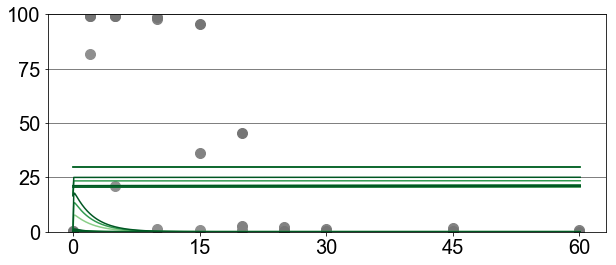

In [25]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, sln1_const, inits,  doses, time, 'phospho', mapk_data=sln1_data, mapk_t100a_data=None, mapk_time=sln1_time,ss=True, Sln1=True, Sho1=False)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1200.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[-5.86746732e-04  2.50639021e-07  2.29645620e-06  1.20684116e-04
  7.38608135e-01]
[1.98039663e-05 5.35740641e-05 1.09864068e-07 1.47950987e-04
 3.39912362e-03]
[4.43809960e-05 4.77829887e-16 1.62233509e-06 1.39886152e-06
 2.97772475e+00]
[4.43810255e-05 1.47408506e-16 3.84429073e-06 2.32920615e-06
 3.03179131e+01]
[4.43816803e-05 1.54199612e-11 2.83687370e-08 1.09748736e-09
 1.31482228e-02]
[8.24645362e-22 5.77524553e-05 5.03084609e-09 4.00182710e-07
 3.53018399e+01]
[1.82075921e-22 5.78911389e-05 2.46827759e-10 3.31986930e-07
 3.28475750e+01]
[1.55922701e-16 4.45791682e-10 4.89953212e-11 4.34319445e-07
 4.29895200e+01]
[1.15309650e-18 1.89628067e-05 1.83222913e-05 9.55187736e-05
 6.38378193e+02]
[ 4.40585465e-05  5.89677508e-09  7.09521413e-08  5.48081479e-21
 -6.38252387e-01]
[-5.86746732e-04  2.50639021e-07  2.29645620e-06  1.20684116e-04
  7.38608135e-01]
[1.98039663e-05 5.35740641e-05 1.09864068e-07 1.47950987e-04
 3.39912362e-03]
[4.43809960e-05 4.77829887e-16 1.62233509e-06 1.3

<Figure size 720x576 with 0 Axes>

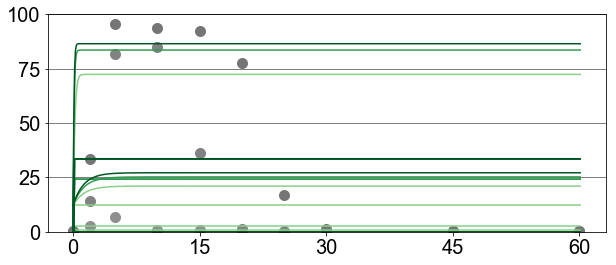

In [26]:
# PLOT INDIVIDUAL SIMS
plotting.plt_param_behaviors(model_fxns, sorted_thetas_EA, 10, sho1_const, inits,  doses, time, 'phospho', mapk_data=sho1_data, mapk_t100a_data=None, mapk_time=sho1_time,ss=True, Sln1=False, Sho1=True)

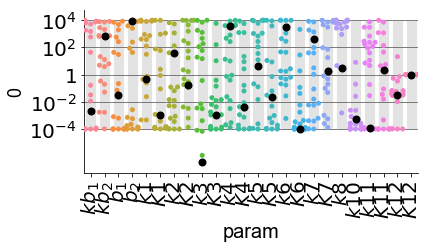

In [27]:
df_top_thetas_EA = pd.DataFrame(sorted_thetas_EA)
df_top_thetas_EA.columns = labelnames

num_plt = 20
df_plt = sorted_thetas_EA[:num_plt]
df_plt = pd.DataFrame(sorted_thetas_EA[:num_plt])
df_plt.columns = labelnames
df_plt_log = df_plt.apply(np.log10)
df_plt_log_M = df_plt_log.melt(var_name='param', value_name='vals')
plotting.plt_param_ranges(labelnames, 'M19', dims, df_plt_log_M, single_theta=df_plt_log, num=0) #black dot is best param


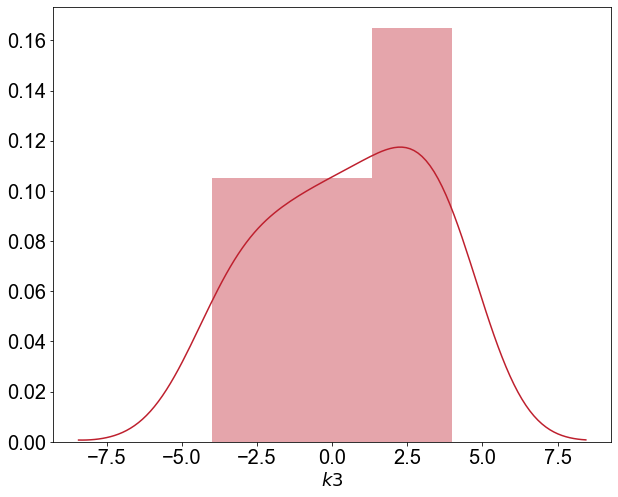

In [26]:
sns.distplot(np.log10(df_top_thetas_EA[labelnames[3]]))

# Check ABC - SMC

In [91]:
base_folder = 'C:/Users/sksuzuki/Documents/GitHub/HOG_encoding_feedbacks/python_modules/ABC_SMC/200121_M3c_ea_abc_smc/'

ea = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0000.hdf5', 'r')

In [93]:
list(ea.keys())

['mses', 'thetas']

In [94]:
ea_thetas = ea['thetas']
ea_mses = ea['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\o

Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

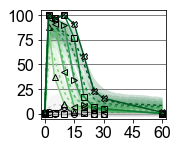

In [96]:
plotting.plt_param_cis(model_fxns, ea_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [97]:
e1 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0001.hdf5', 'r')

In [98]:
e1_thetas = e1['thetas']
e1_mses = e1['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

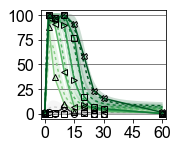

In [99]:
plotting.plt_param_cis(M2c_fxns, e1_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='')

In [100]:
e4 = h5py.File(base_folder+'200121_M3c_ea_abc_smc_0004.hdf5', 'r')

e4_thetas = e4['thetas']
e4_mses = e4['mses']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Dose: 0 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 50000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 150000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 250000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 350000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 450000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Dose: 550000 complete.


C:\Users\sksuzuki\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

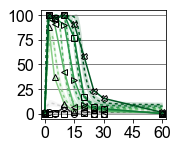

In [102]:
plotting.plt_param_cis(M2c_fxns, e4_thetas, params_constants, initials,  doses, time, 2,
                        exp_data=mapk_wt_data, exp_time=mapk_time, ss=True, ci='sd',
                        save_fig='test03')